In [33]:
import pandas as pd
import random as rd                     
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA   
from sklearn import preprocessing   
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [ ]:
# Load the CSV file from the data directory
df_training = pd.read_csv(r"/Users/JEFFEYMARKUS/team6-project/diagnose_the_disease/datasets/Training.csv")
df_training.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [48]:

# Separate features and target variable
X = df_training.drop(columns=['prognosis', 'Unnamed: 133'], axis=1)
y = df_training['prognosis'] 

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the scaled features
pd.DataFrame(X_scaled, columns=X.columns).head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,2.501327,2.293369,6.674995,-0.21738,-0.149813,-0.439995,-0.401837,-0.21738,-0.21738,-0.149813,...,-0.149813,-0.149813,-0.149813,-0.154014,-0.154014,-0.154014,-0.154014,-0.154014,-0.154014,-0.154014
1,-0.399788,2.293369,6.674995,-0.21738,-0.149813,-0.439995,-0.401837,-0.21738,-0.21738,-0.149813,...,-0.149813,-0.149813,-0.149813,-0.154014,-0.154014,-0.154014,-0.154014,-0.154014,-0.154014,-0.154014
2,2.501327,-0.436040,6.674995,-0.21738,-0.149813,-0.439995,-0.401837,-0.21738,-0.21738,-0.149813,...,-0.149813,-0.149813,-0.149813,-0.154014,-0.154014,-0.154014,-0.154014,-0.154014,-0.154014,-0.154014
3,2.501327,2.293369,-0.149813,-0.21738,-0.149813,-0.439995,-0.401837,-0.21738,-0.21738,-0.149813,...,-0.149813,-0.149813,-0.149813,-0.154014,-0.154014,-0.154014,-0.154014,-0.154014,-0.154014,-0.154014
4,2.501327,2.293369,6.674995,-0.21738,-0.149813,-0.439995,-0.401837,-0.21738,-0.21738,-0.149813,...,-0.149813,-0.149813,-0.149813,-0.154014,-0.154014,-0.154014,-0.154014,-0.154014,-0.154014,-0.154014


In [50]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)

# Check the number of components retained
print(f"Number of components retained: {pca.n_components_}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")


Number of components retained: 36
Explained variance ratio: [0.07350362 0.06640265 0.05207505 0.04829505 0.04327994 0.03763081
 0.03638701 0.03536861 0.03400703 0.03300662 0.03131244 0.03007534
 0.02846417 0.0276756  0.02582514 0.02528087 0.02448536 0.0227789
 0.02214373 0.02114335 0.02015011 0.01973819 0.01926028 0.01840689
 0.01734012 0.01681888 0.01628609 0.01597968 0.01516357 0.01466796
 0.01301988 0.01145631 0.01098906 0.00845381 0.00702689 0.00663057]


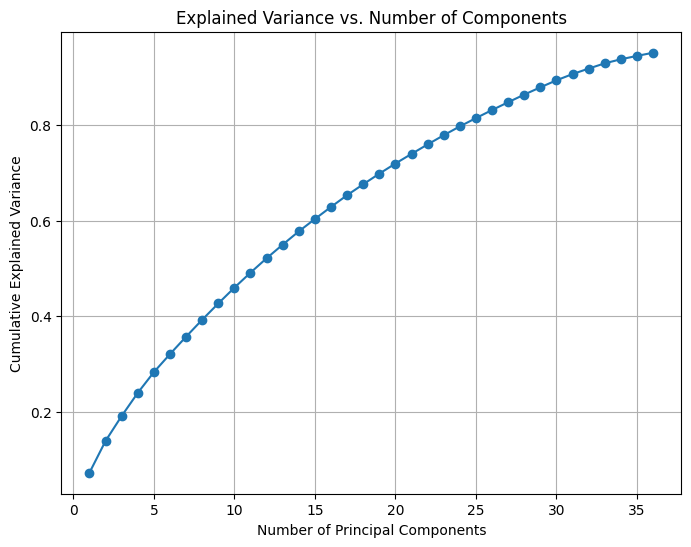

In [ ]:
# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

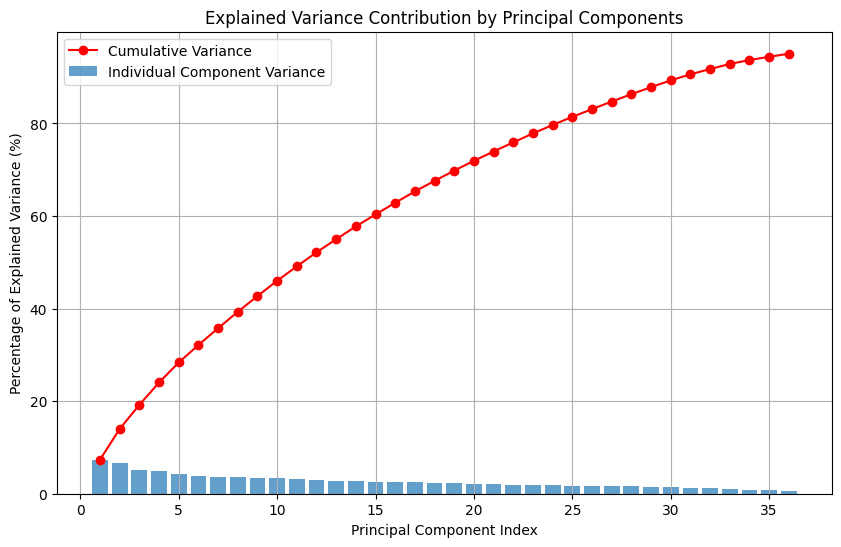

In [54]:
# Calculating the the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio * 100, alpha=0.7, label='Individual Component Variance')
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio * 100, marker='o', color='red', label='Cumulative Variance')
plt.xlabel('Principal Component Index')
plt.ylabel('Percentage of Explained Variance (%)')
plt.title('Explained Variance Contribution by Principal Components')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [55]:

# Get the loadings
loadings = pd.DataFrame(
    pca.components_.T,  # Transpose to match variables with components
    columns=[f'PC{i+1}' for i in range(len(pca.components_))],
    index=X.columns  # Original variable names
)

# Display top contributing variables for each PC
for i in range(loadings.shape[1]):
    print(f"\nTop contributing variables for {loadings.columns[i]}:")
    print(loadings.iloc[:, i].sort_values(ascending=False).head(5))



Top contributing variables for PC1:
runny_nose           0.232336
congestion           0.232336
redness_of_eyes      0.232336
throat_irritation    0.232336
sinus_pressure       0.232336
Name: PC1, dtype: float64

Top contributing variables for PC2:
brittle_nails           0.245146
swollen_extremeties     0.245146
enlarged_thyroid        0.245146
weight_gain             0.239935
cold_hands_and_feets    0.239935
Name: PC2, dtype: float64

Top contributing variables for PC3:
loss_of_appetite     0.265452
yellowing_of_eyes    0.260119
yellowish_skin       0.251844
dark_urine           0.246395
abdominal_pain       0.242355
Name: PC3, dtype: float64

Top contributing variables for PC4:
excessive_hunger                0.289814
blurred_and_distorted_vision    0.270172
palpitations                    0.219498
slurred_speech                  0.219498
drying_and_tingling_lips        0.215280
Name: PC4, dtype: float64

Top contributing variables for PC5:
obesity                    0.319087
bruis

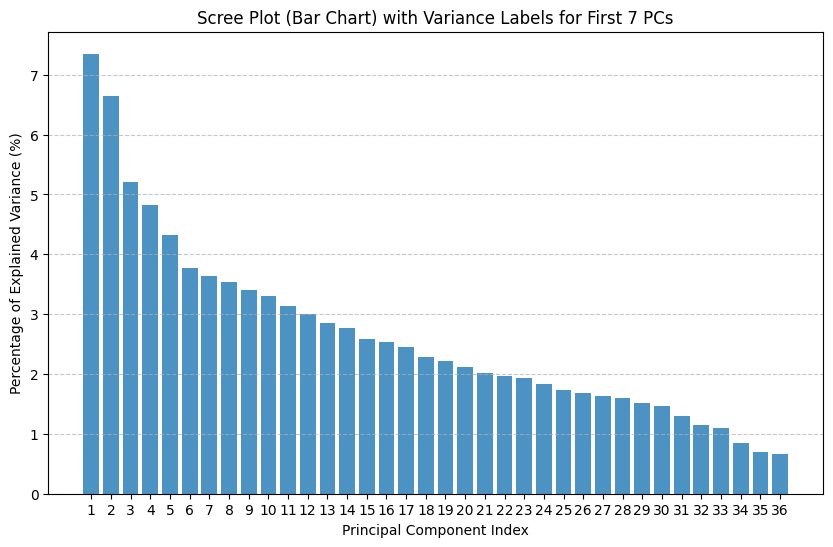

In [69]:
# Scree Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), 
               pca.explained_variance_ratio_ * 100, 
               alpha=0.8)
plt.xlabel('Principal Component Index')
plt.ylabel('Percentage of Explained Variance (%)')
plt.title('Scree Plot (Bar Chart) with Variance Labels for First 7 PCs')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))  # Label all components
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [75]:
# Prepare a DataFrame for explained variance
explained_variance_data = {
    'Principal Component': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Explained Variance (%)': [round(variance * 100, 2) for variance in pca.explained_variance_ratio_]
}

explained_variance_df = pd.DataFrame(explained_variance_data)

# Style the table
styled_table = (explained_variance_df.head(36)
                .style.set_table_styles(
                    [{'selector': 'thead', 'props': [('background-color', 'white'), ('color', 'black'), ('font-weight', 'bold')]},
                     {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]},
                     {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#e6e6e6')]}]
                )
                .set_properties(**{'text-align': 'center', 'color': 'black', 'font-size': '12px'})
                .set_caption('Explained Variance (%) by Principal Components'))

# Display the table
styled_table


,Principal Component,Explained Variance (%)
0,PC1,7.350000
1,PC2,6.640000
2,PC3,5.210000
3,PC4,4.830000
4,PC5,4.330000
5,PC6,3.760000
6,PC7,3.640000
7,PC8,3.540000
8,PC9,3.400000
9,PC10,3.300000
